In [113]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [55]:
df=pd.read_csv('loan.csv')

In [56]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [57]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [63]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

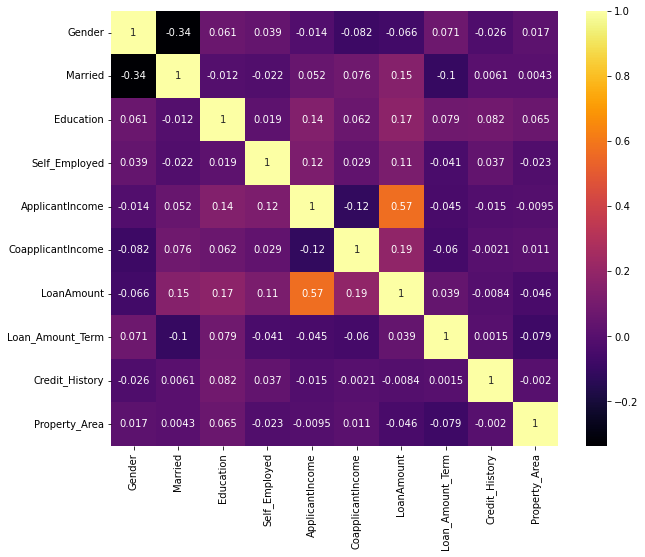

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

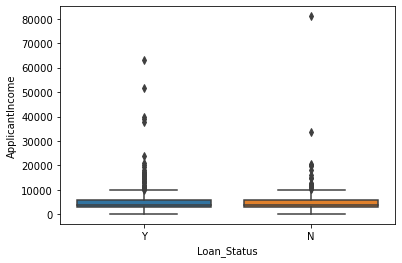

In [82]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)

In [65]:
df['Gender']=np.where(df['Gender'] =='Male',0,1)

In [66]:
df['Married']=np.where(df['Married'] =='No',0,1)

In [67]:
encoder=LabelEncoder()

In [68]:
df['Education']=np.where(df['Education'] =='Not Graduate',0,1)

In [69]:
df['Self_Employed']=np.where(df['Self_Employed'] =='No',0,1)

In [70]:
df['Property_Area']=np.where(df['Property_Area'] == 'Rural',0,
         np.where(df['Property_Area'] == 'Semiurban',1,2))

In [87]:
df = df.drop(['Loan_ID'], axis = 1)

In [88]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,Y
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,Y


In [72]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [73]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [129]:
df['Loan_Amount_Term'].mode()[0]

360.0

In [89]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [43]:
col_list=['Gender''Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [91]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [93]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [161]:
model=SVC(C=70)

In [162]:
model.fit(x_train,y_train)

SVC(C=70)

In [163]:
model.score(x_train,y_train)

0.6883910386965377

In [164]:
model.score(x_test,y_test)

0.7317073170731707

In [165]:
scaler=StandardScaler()

In [166]:
model2=LogisticRegression()

In [167]:
model2.fit(x_train,y_train)

LogisticRegression()

In [168]:
model2.score(x_train,y_train)

0.8044806517311609

In [169]:
model2.score(x_test,y_test)

0.8373983739837398